In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import os

def science_plot(fontsize = 8):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()


In [2]:
data_path = r'C:\Users\verci\Documents\Python Code\Physics157\CH1\radioactive.csv'
data_file = pd.read_csv(data_path)
print(data_file)


     T   4  4.1  4.2  4.3  4.4   6  6.1  6.2  6.3  ...  10  10.1  10.2  10.3  \
0    0   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
1    1  24   24   25   24   21  14   20   13   17  ...  10    12    11    14   
2    2  18   15   16   26   17  13   14   11   16  ...  12    12    11     5   
3    3   9   14   14   11   15   9   15    7   10  ...  11     4    12    12   
4    4  11    8    9   12   18  10   12   11   12  ...   5    13     2    10   
..  ..  ..  ...  ...  ...  ...  ..  ...  ...  ...  ...  ..   ...   ...   ...   
64  64   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
65  65   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
66  66   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
67  67   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
68  68   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   

    10.4  12  12.1  12.2  12.3  12.4  


In [3]:
df = data_file.copy()
# Perform cumulative sum on all columns except 'T'
df.iloc[:, 1:] = df.iloc[:, 1:].cumsum()

# Subtract from 100
df.iloc[:, 1:] = 100 - df.iloc[:, 1:]

print(df)

     T    4  4.1  4.2  4.3  4.4    6  6.1  6.2  6.3  ...   10  10.1  10.2  \
0    0  100  100  100  100  100  100  100  100  100  ...  100   100   100   
1    1   76   76   75   76   79   86   80   87   83  ...   90    88    89   
2    2   58   61   59   50   62   73   66   76   67  ...   78    76    78   
3    3   49   47   45   39   47   64   51   69   57  ...   67    72    66   
4    4   38   39   36   27   29   54   39   58   45  ...   62    59    64   
..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
64  64    0    0    0    0    0    0    0    0    0  ...    0     0     0   
65  65    0    0    0    0    0    0    0    0    0  ...    0     0     0   
66  66    0    0    0    0    0    0    0    0    0  ...    0     0     0   
67  67    0    0    0    0    0    0    0    0    0  ...    0     0     0   
68  68    0    0    0    0    0    0    0    0    0  ...    0     0     0   

    10.3  10.4   12  12.1  12.2  12.3  12.4  
0    100   100  100   100   1

In [4]:
# Define the columns to compute statistics for
columns_4  = ['4', '4.1', '4.2', '4.3', '4.4']
columns_6  = ['6', '6.1', '6.2', '6.3', '6.4']
columns_10 = ['10', '10.1', '10.2', '10.3', '10.4']
columns_12 = ['12', '12.1', '12.2', '12.3', '12.4']

# Compute the mean and standard deviation
df["4 ave"] = df[columns_4].mean(axis=1)
df["4 std"] = df[columns_4].std(axis=1)
df["4 ser"] = 2* df[columns_4].std(axis=1) / np.sqrt(5)
df["6 ave"] = df[columns_6].mean(axis=1)
df["6 std"] = df[columns_6].std(axis=1)
df["6 ser"] = 2* df[columns_6].std(axis=1) / np.sqrt(5)
df["10 ave"] = df[columns_10].mean(axis=1)
df["10 std"] = df[columns_10].std(axis=1)
df["10 ser"] = 2* df[columns_10].std(axis=1) / np.sqrt(5)
df["12 ave"] = df[columns_12].mean(axis=1)
df["12 std"] = df[columns_12].std(axis=1)
df["12 ser"] = 2* df[columns_12].std(axis=1) / np.sqrt(5)

print(df)

     T    4  4.1  4.2  4.3  4.4    6  6.1  6.2  6.3  ...     4 ser  6 ave  \
0    0  100  100  100  100  100  100  100  100  100  ...  0.000000  100.0   
1    1   76   76   75   76   79   86   80   87   83  ...  1.356466   83.8   
2    2   58   61   59   50   62   73   66   76   67  ...  4.242641   70.0   
3    3   49   47   45   39   47   64   51   69   57  ...  3.440930   59.4   
4    4   38   39   36   27   29   54   39   58   45  ...  4.874423   47.4   
..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...    ...   
64  64    0    0    0    0    0    0    0    0    0  ...  0.000000    0.0   
65  65    0    0    0    0    0    0    0    0    0  ...  0.000000    0.0   
66  66    0    0    0    0    0    0    0    0    0  ...  0.000000    0.0   
67  67    0    0    0    0    0    0    0    0    0  ...  0.000000    0.0   
68  68    0    0    0    0    0    0    0    0    0  ...  0.000000    0.0   

       6 std     6 ser  10 ave    10 std    10 ser  12 ave    12 std    12 

In [5]:
# halflives 
## curve fitting 
def half_life_model(t, p):
    y = 100 * (1-p)**t
    return y

def R2(y_exp, y_theo):
    SSR = np.sum((y_exp - y_theo)**2)
    y_mean = np.mean(y_exp)
    SST = np.sum((y_exp - y_mean)**2)
    if SST == 0:
        if SSR == 0:
            return 1
        else: return 0
    return 1 - SSR / SST

def RMSE(y_exp, y_theo):
    return np.sqrt((1/len(y_exp) * np.sum((y_exp - y_theo)**2)))
probs = []
def curve_fitting(P):
    # Perform curve fitting
    x_data = df['T']
    y_data = df[f'{P} ave']
    params, covariance = sp.optimize.curve_fit(half_life_model, x_data, y_data, p0=[1/P])
    R2_val = R2(y_data, 100*(1-1/P)**x_data)
    p = params[0]
    probs.append(p)
    # print(f'N_0 = {N}, N = 100')
    hlp = - 1/np.log2(1-p)
    hlP = - 1/np.log2(1-1/P)
    
    print(f'{P} Faces')
    print(f'p0 = {p:.4f}, p = {1/P:.4f}, S0 = {1/p:.4f}')
    print(f'Halflife of p0 = {p:.4f} := {hlp:.4f}')
    print(f'Halflife of p  = {1/P:.4f} := {hlP:.4f}')
    print(f'Percent error  = {100 * np.abs(hlp - hlP)/hlP:.3f}%')
    print(f'R^2 value      = {R2_val:.4f}')
    print(f'RMSE value     = {RMSE(y_data, 100*(1-1/P)**x_data):.4f}')
    #print(f'p value        = {p_values}')
    print('')

P = [4, 6, 10, 12]
for Pi in P:
    curve_fitting(Pi)
print(np.array(probs))

4 Faces
p0 = 0.2374, p = 0.2500, S0 = 4.2121
Halflife of p0 = 0.2374 := 2.5574
Halflife of p  = 0.2500 := 2.4094
Percent error  = 6.143%
R^2 value      = 0.9982
RMSE value     = 0.7384

6 Faces
p0 = 0.1625, p = 0.1667, S0 = 6.1539
Halflife of p0 = 0.1625 := 3.9088
Halflife of p  = 0.1667 := 3.8018
Percent error  = 2.814%
R^2 value      = 0.9991
RMSE value     = 0.5912

10 Faces
p0 = 0.1101, p = 0.1000, S0 = 9.0806
Halflife of p0 = 0.1101 := 5.9409
Halflife of p  = 0.1000 := 6.5788
Percent error  = 9.697%
R^2 value      = 0.9926
RMSE value     = 1.9317

12 Faces
p0 = 0.0722, p = 0.0833, S0 = 13.8448
Halflife of p0 = 0.0722 := 9.2456
Halflife of p  = 0.0833 := 7.9662
Percent error  = 16.061%
R^2 value      = 0.9842
RMSE value     = 3.2121

[0.23740851 0.16249808 0.11012491 0.07222926]


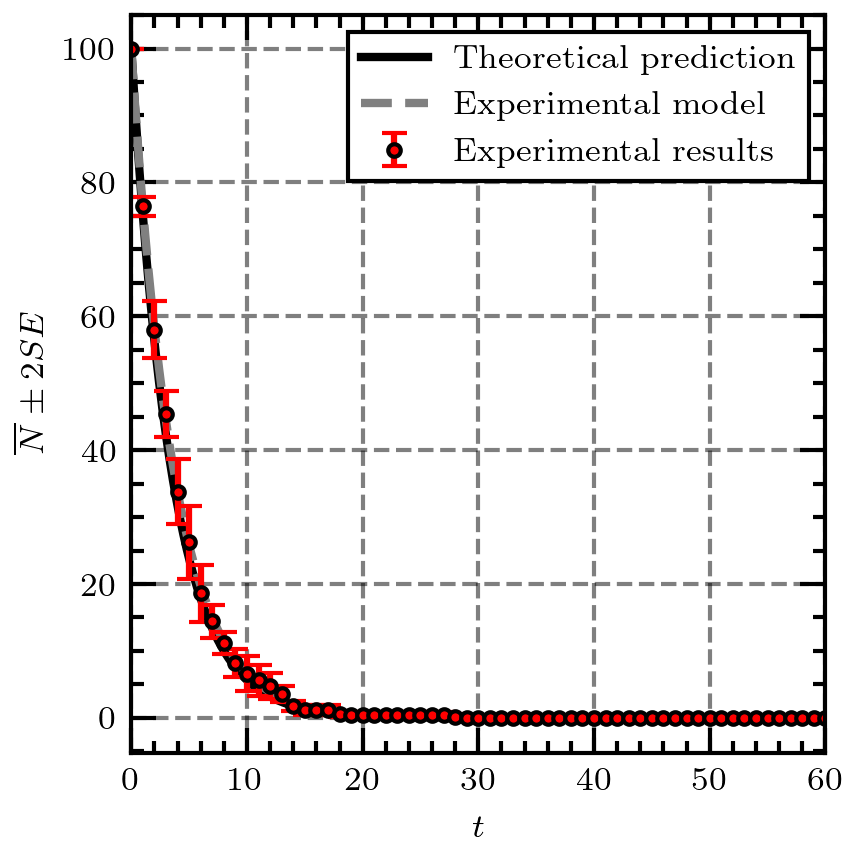

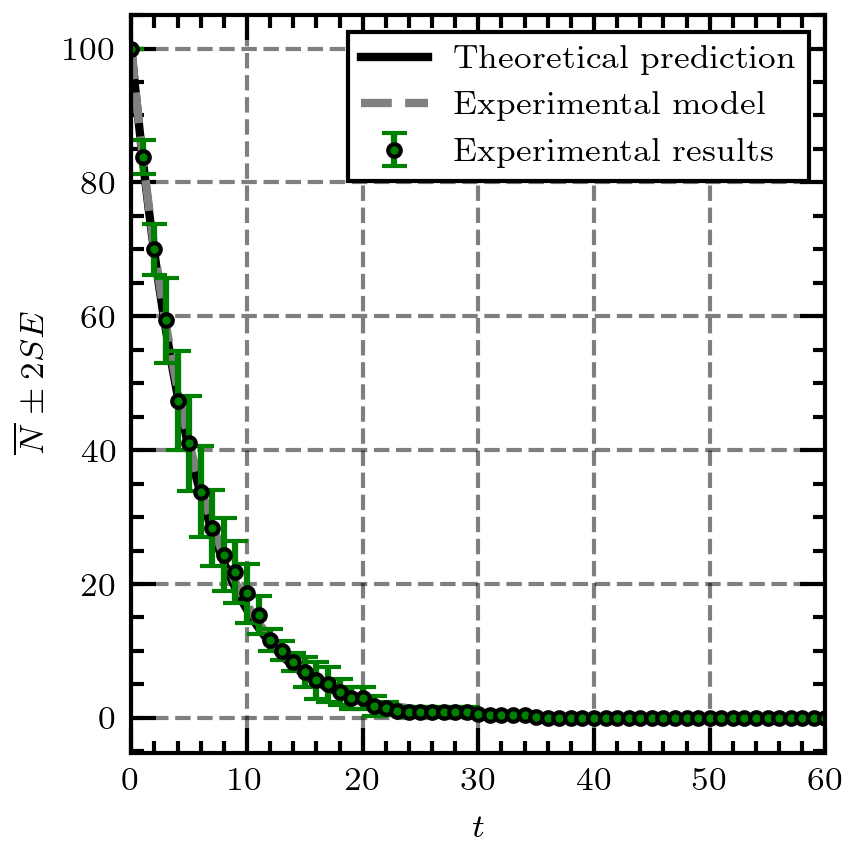

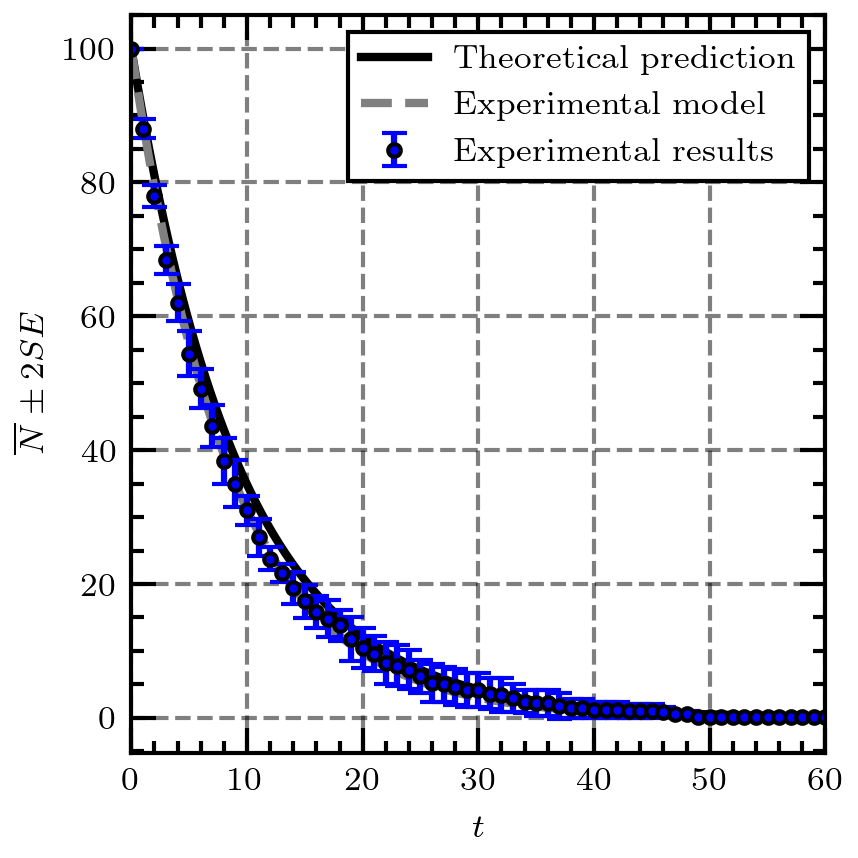

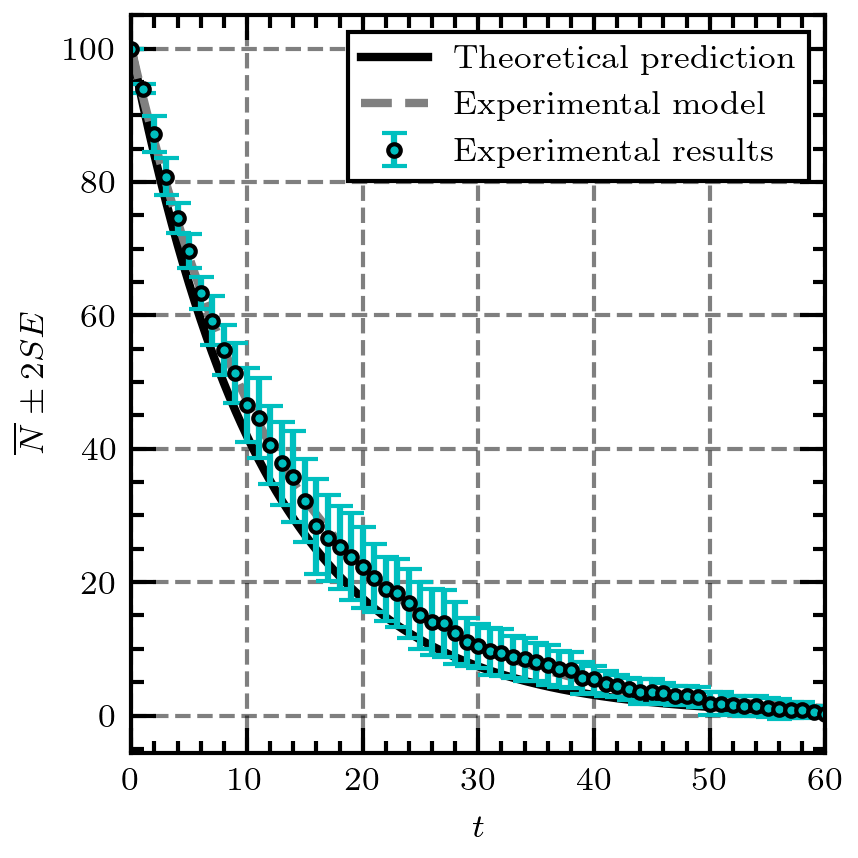

In [6]:
imsave_path = r'C:\Users\verci\Documents\Python Code\Physics157\CH1\decay_images'
imsave = 0
x = np.arange(0,100,0.1)
pi = [4,6,10,12]
colors = ['r','g','b', 'c']
varlist = ['','.1','.2','.3','.4']
for i, p in enumerate(pi):
    y = 100*(1-1/p)**x
    plt.figure(figsize = (3,3), dpi= 300)
    plt.errorbar(
        df['T'],
        df[f'{p} ave'], 
        yerr = df[f'{p} ser'], 
        color = colors[i], 
        fmt='.', 
        capsize=3,
        markeredgecolor='k', 
        elinewidth = 1.5, 
        linestyle = '',
        linewidth = 1.5,
        zorder = 2,
        label = 'Experimental results'
        )
    plt.plot(
        x,
        y,
        color = 'k', 
        zorder = 1,
        label = 'Theoretical prediction'
        )
    y1 = 100*(1-probs[i])**x
    plt.plot(
        x,
        y1,
        color = 'gray', 
        zorder = 1,
        label = 'Experimental model',
        linestyle = '--'
        )
    # for var in varlist:
    #     plt.step(df['T'],df[f'{p}'+var])
    plt.xlim(0,60)
    plt.ylabel(r'$\overline{N} \pm 2SE $')
    plt.xlabel('$t$')
    plt.legend()
    plt.tight_layout()
    imsave += 1
    plt.savefig(os.path.join(imsave_path, f'img{imsave}.png'))
    plt.show()

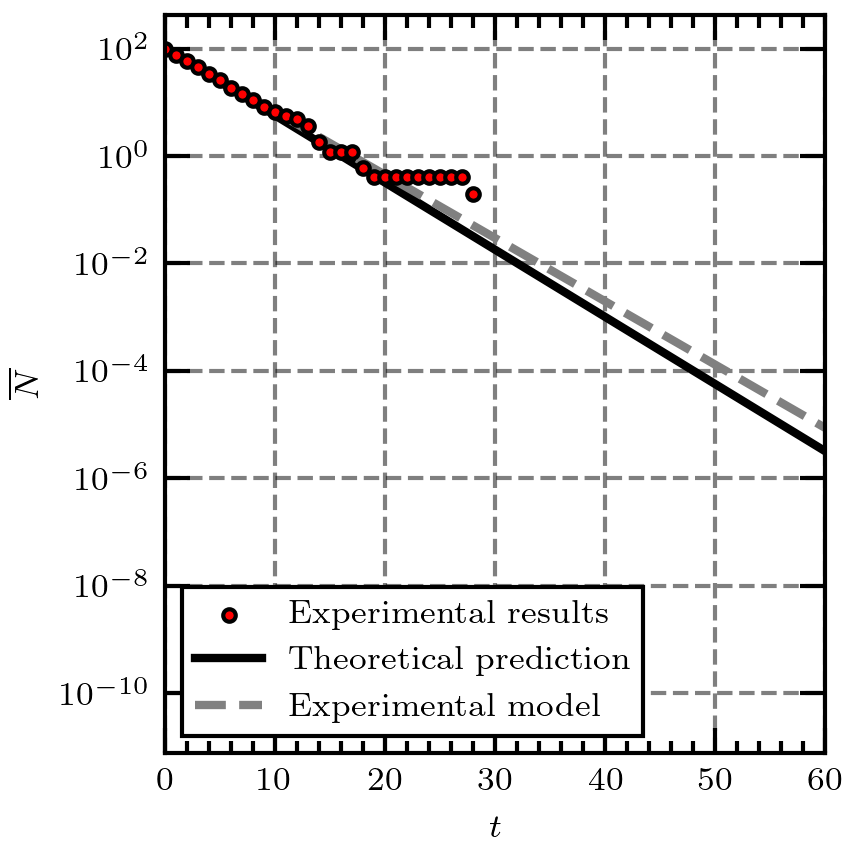

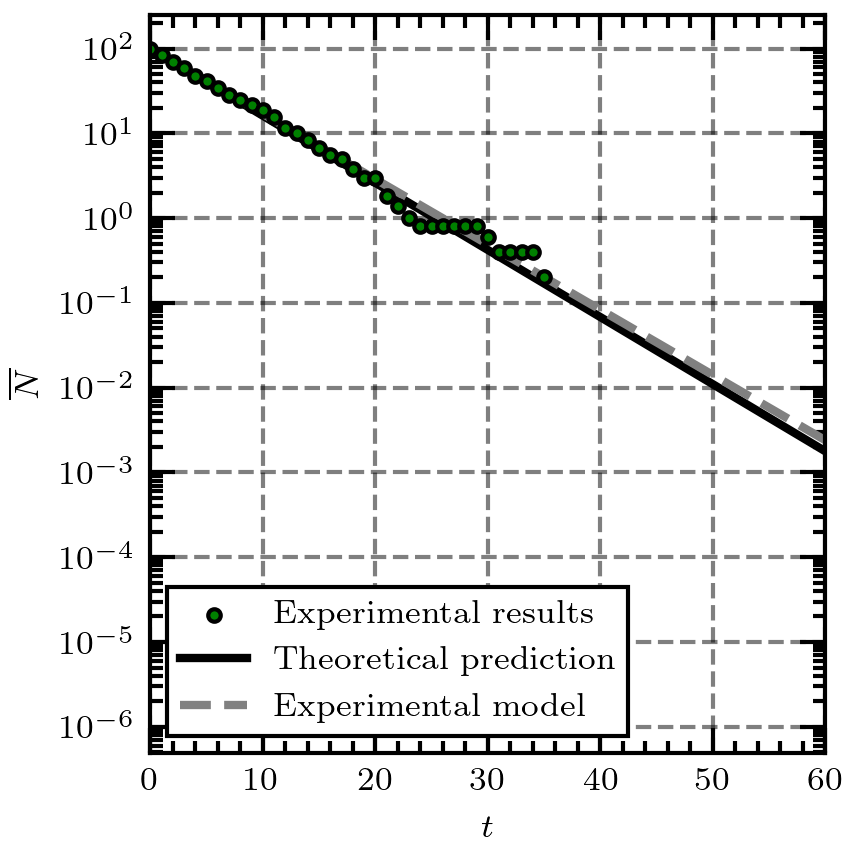

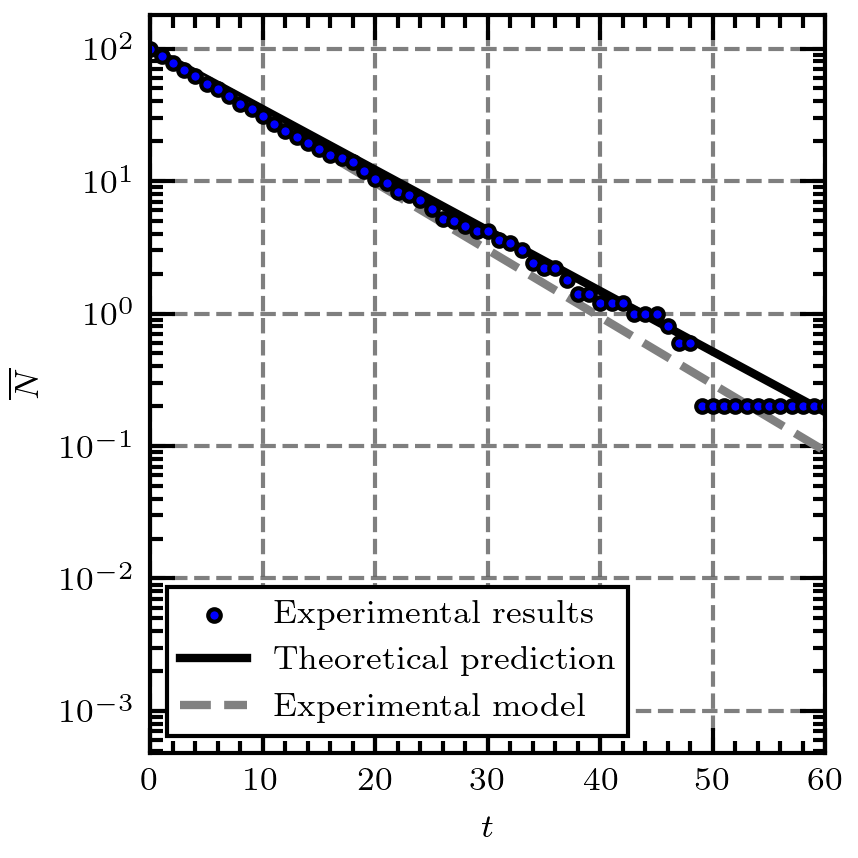

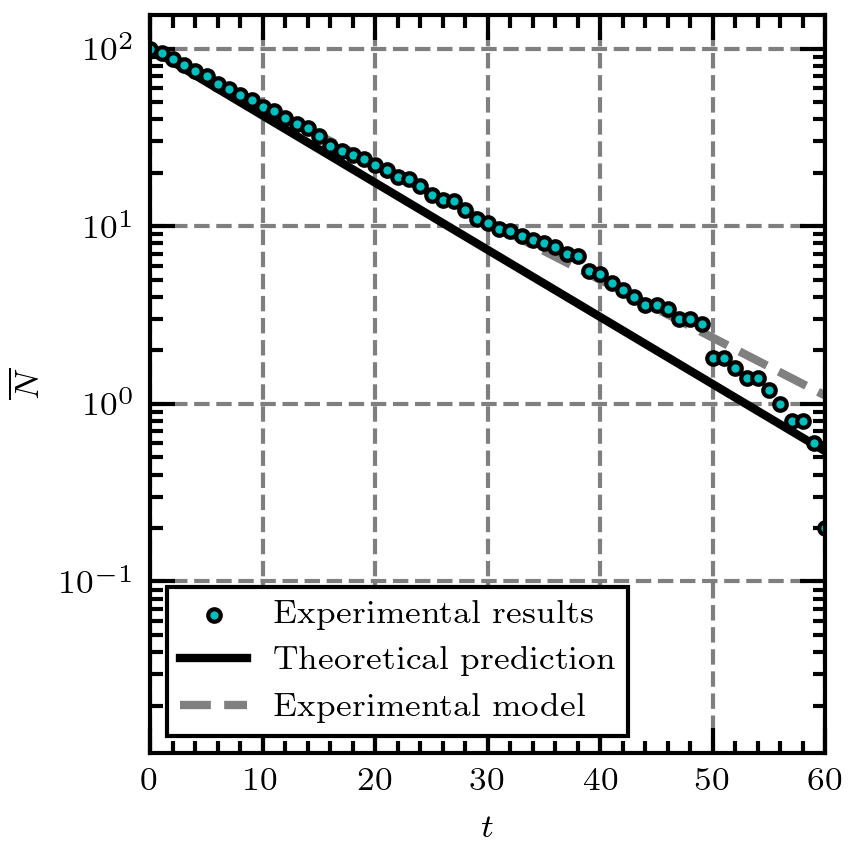

In [7]:
for i,p in enumerate(pi):
    y = 100*(1-1/p)**x
    plt.figure(figsize = (3,3), dpi= 300)
    # plt.errorbar(
    #     df['T'],
    #     df['4 ave'], 
    #     yerr = df['4 std'], 
    #     color = 'r', 
    #     fmt='.', 
    #     capsize=3,
    #     markeredgecolor='k', 
    #     elinewidth = 1.5, 
    #     linestyle = '-',
    #     linewidth = 1.5
    #     )
    plt.scatter(
        df['T'],
        df[f'{p} ave'], 
        color = colors[i],
        marker = '.',
        edgecolor = 'k',
        zorder = 2,
        label = 'Experimental results'
    )
    plt.plot(
        x,
        y,
        color = 'k', 
        zorder = 1,
        label = 'Theoretical prediction'
        )
    y1 = 100*(1-probs[i])**x
    plt.plot(
        x,
        y1,
        color = 'gray', 
        zorder = 1,
        label = 'Experimental model',
        linestyle = '--'
        )
    plt.yscale("log")
    plt.xlim(0,60)
    plt.ylabel(r'$\overline{N}$')
    plt.xlabel('$t$')
    plt.legend(loc = 'lower left')
    plt.tight_layout()
    imsave += 1
    plt.savefig(os.path.join(imsave_path, f'img{imsave}.png'))
    plt.show()

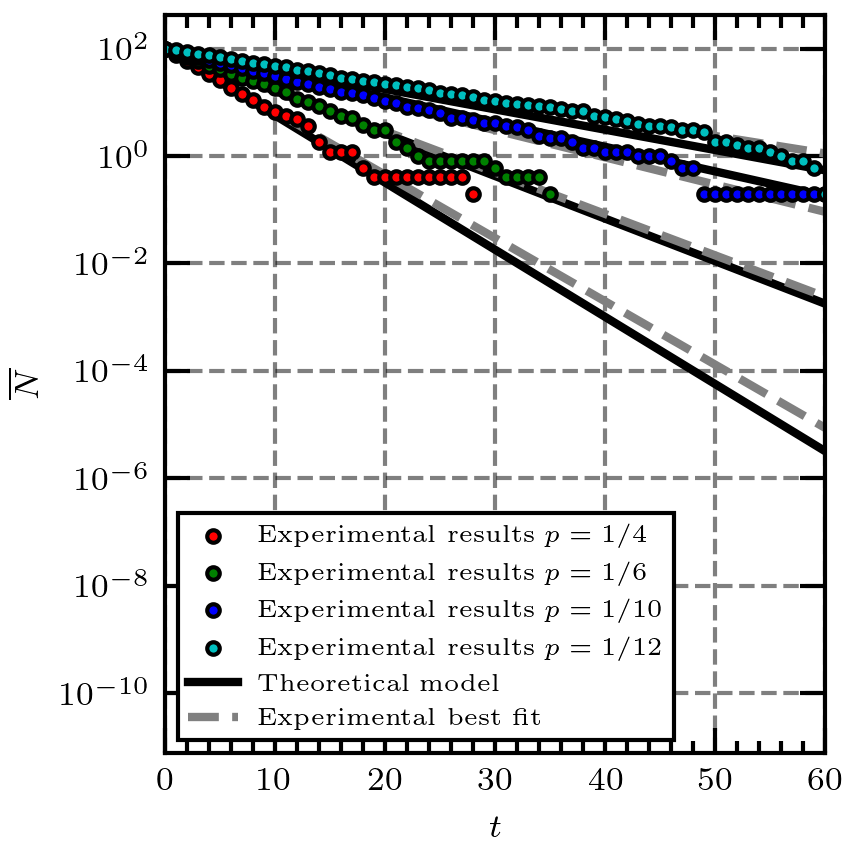

In [8]:
plt.figure(figsize = (3,3), dpi= 300)
for i,p in enumerate(pi):
    y = 100*(1-1/p)**x
    
    # plt.errorbar(
    #     df['T'],
    #     df['4 ave'], 
    #     yerr = df['4 std'], 
    #     color = 'r', 
    #     fmt='.', 
    #     capsize=3,
    #     markeredgecolor='k', 
    #     elinewidth = 1.5, 
    #     linestyle = '-',
    #     linewidth = 1.5
    #     )
    plt.scatter(
        df['T'],
        df[f'{p} ave'], 
        color = colors[i],
        marker = '.',
        edgecolor = 'k',
        zorder = 2,
        label = f'Experimental results $p = 1/{p}$'
    )
    plt.plot(
        x,
        y,
        color = 'k', 
        zorder = 1,
        #label = 'Theoretical prediction'
        )
    y1 = 100*(1-probs[i])**x
    plt.plot(
        x,
        y1,
        color = 'gray', 
        zorder = 1,
        #label = 'Experimental model',
        linestyle = '--'
        )
plt.plot([-1],[1], color = 'k', label = 'Theoretical model')
plt.plot([-1],[1], color = 'gray', linestyle = '--', label = 'Experimental best fit')
plt.yscale("log")
plt.xlim(0,60)
plt.ylabel(r'$\overline{N}$')
plt.xlabel('$t$')
plt.legend(loc = 'lower left', prop={'size': 6})
plt.tight_layout()
imsave += 1
plt.savefig(os.path.join(imsave_path, f'img{imsave}.png'))
plt.show()

In [9]:
df.to_csv("decaylolz.csv", index=False)

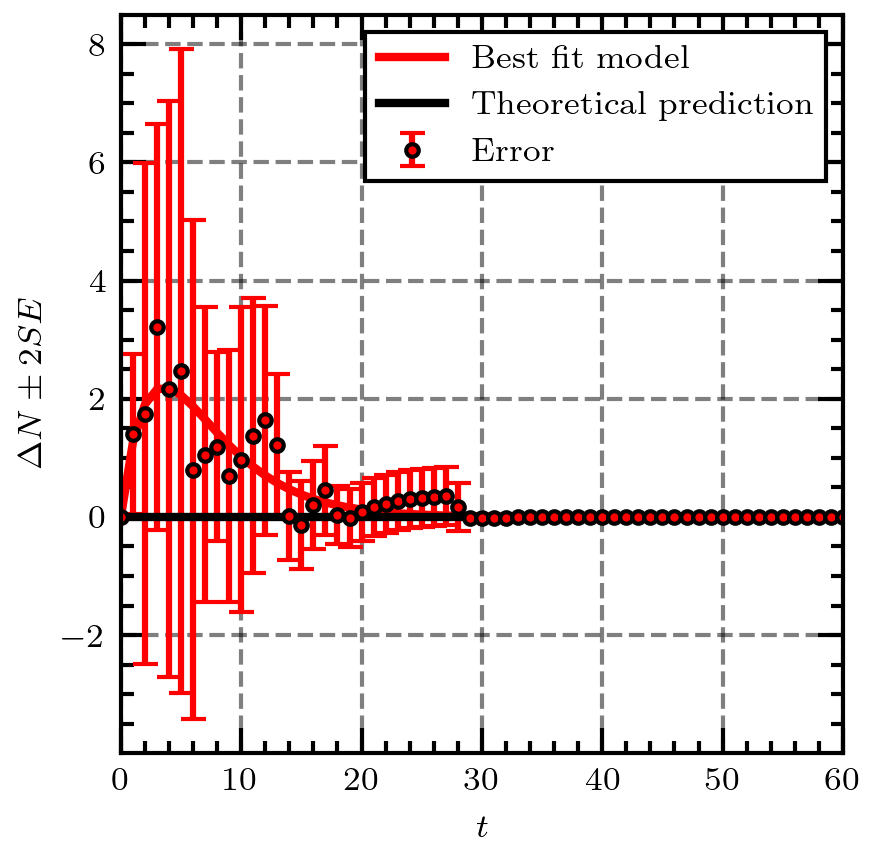

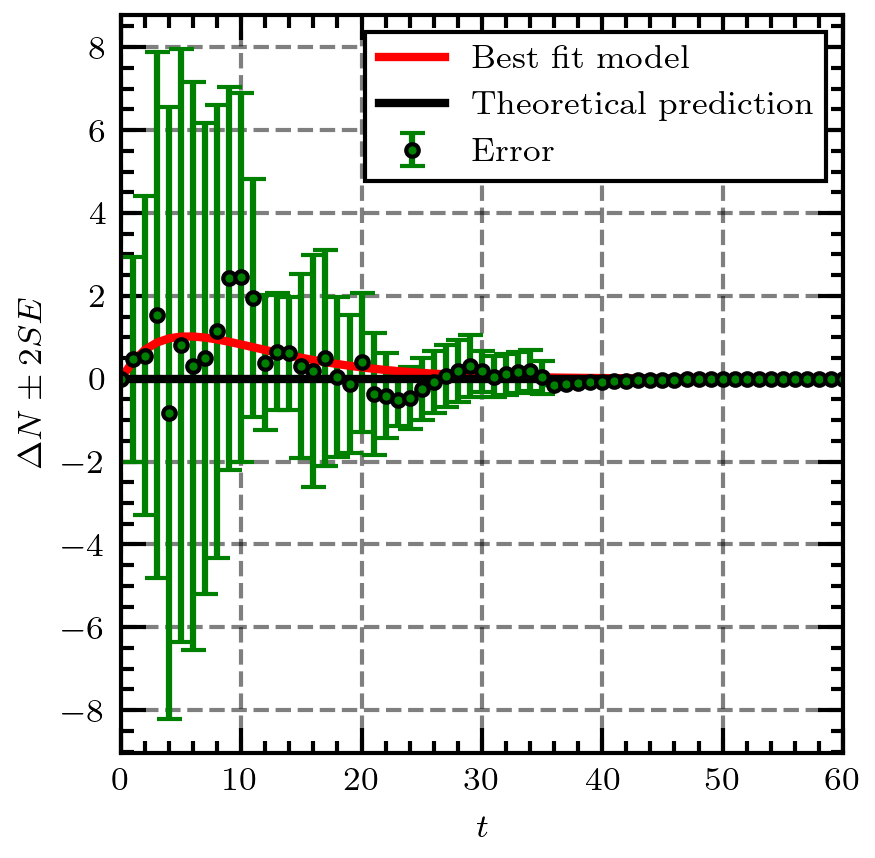

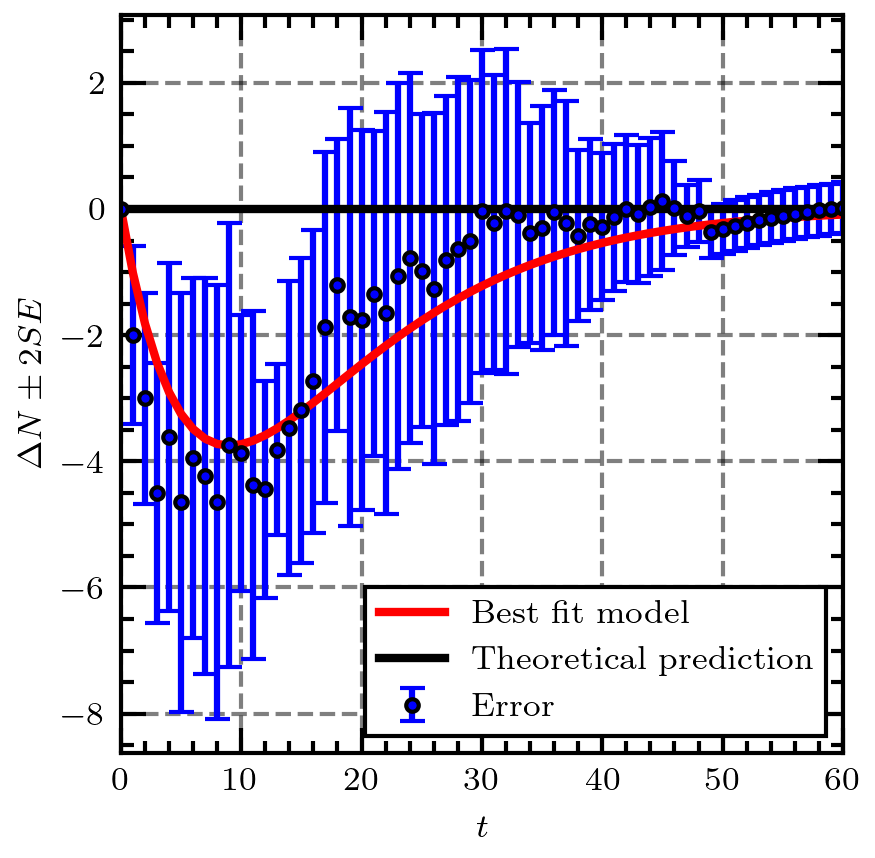

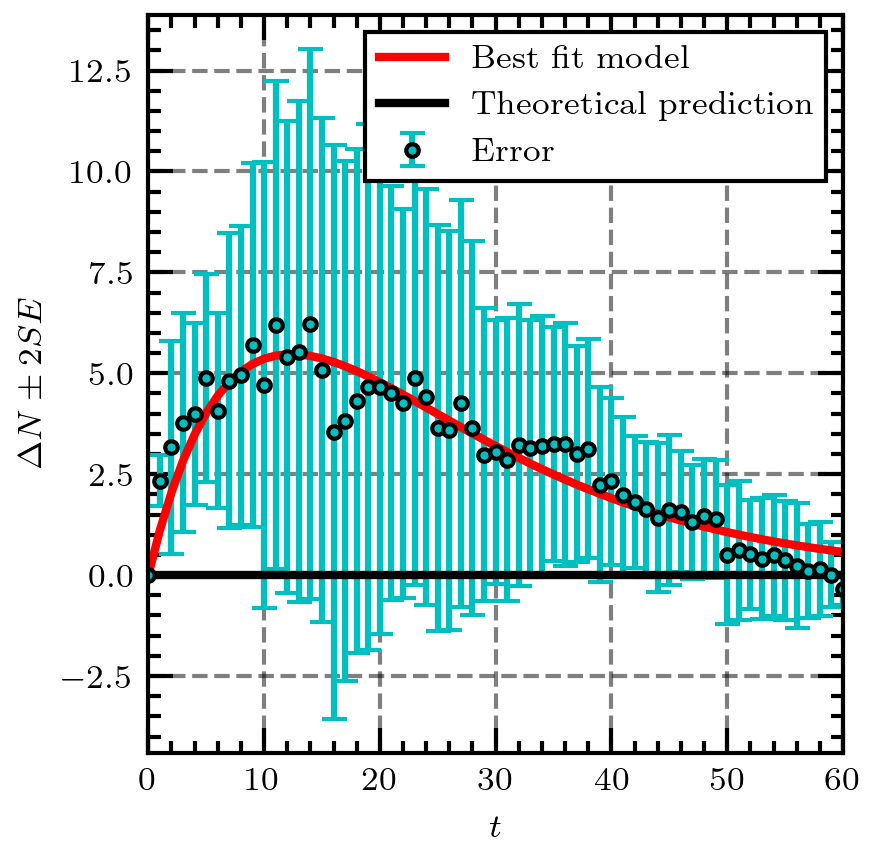

In [10]:
pi = [4,6,10,12]
colors = ['r','g','b','c']
for i,p in enumerate(pi):
    err = df[f'{p} ave'] - 100*(1 - 1/p)**df['T']
    secer = 100*(1 - probs[i])**df['T'] - 100*(1 - 1/p)**df['T']
    plt.figure(figsize = (3,3), dpi=300)
    plt.errorbar(
        df['T'],
        err, 
        yerr = df[f'{p} ser'], 
        color = colors[i], 
        fmt='.', 
        capsize=3,
        markeredgecolor='k', 
        elinewidth = 1.5, 
        linestyle = '',
        linewidth = 1.5,
        label = 'Error'
    )
    plt.plot(
        df['T'],
        secer,
        color = 'r',
        label = 'Best fit model'
    )
    plt.axhline(0, color = 'k', label ='Theoretical prediction')
    #plt.title(f'{p} sides')
    plt.xlabel('$t$')
    plt.ylabel(r'$\Delta N \pm 2SE$')
    plt.legend()
    plt.tight_layout()
    plt.xlim(0,60)
    imsave += 1
    plt.savefig(os.path.join(imsave_path, f'img{imsave}.png'))
    plt.show()

-0.047442375833404826 0.10348486823722514 95.22575935124584


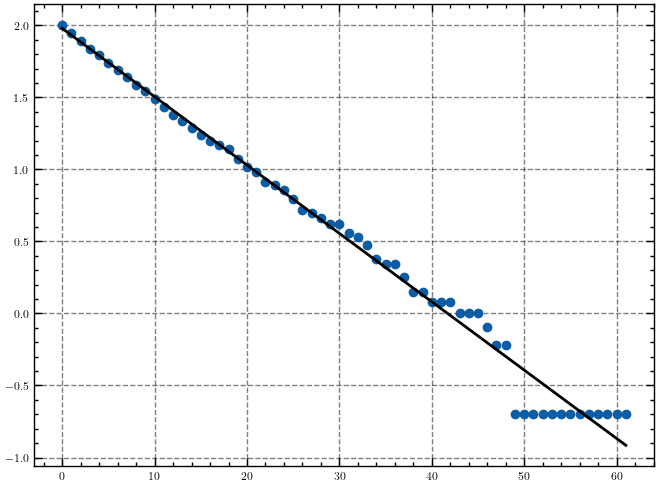

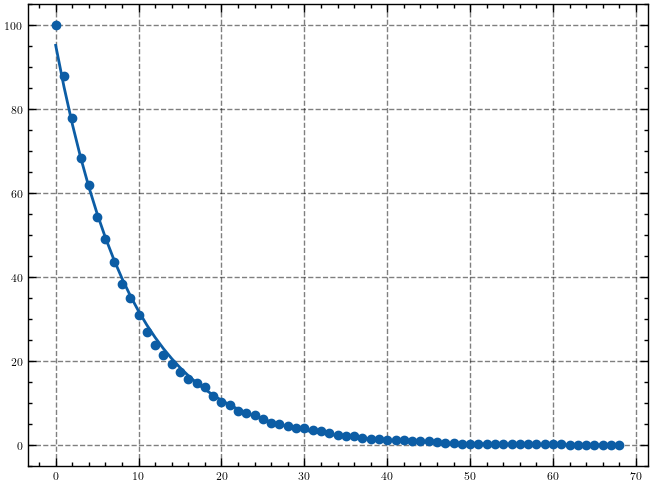

In [11]:
df_clean = df[['T', '10 ave']].copy()
df_clean = df_clean[df_clean['10 ave'] > 0]  # Keep only positive values

x = df_clean['T']
y = np.log10(df_clean['10 ave'])

def line(x, m, b):
    return m*x + b

params, covs = sp.optimize.curve_fit(line, x, y)
slope = params[0]
b = params[1]
print(slope, (1 - 10**slope), 10**b)
plt.plot(x, slope*x+ b, color = 'k')
plt.scatter(x,y)
plt.show()

plt.scatter(df['T'], df['10 ave'])
plt.plot(df['T'], 10**b * (10**slope)**df['T'])
plt.show()

In [12]:

# Half-life model
def half_life_model(t, N, p):
    return N * (1 - p) ** t

# R-squared function
def R2(y_exp, y_theo):
    SSR = np.sum((y_exp - y_theo) ** 2)
    y_mean = np.mean(y_exp)
    SST = np.sum((y_exp - y_mean) ** 2)
    return 1 if SST == 0 else 1 - SSR / SST

# RMSE function
def RMSE(y_exp, y_theo):
    return np.sqrt(np.mean((y_exp - y_theo) ** 2))

# Curve fitting function
def curve_fitting(P):
    x_data = df['T']
    y_data = df[f'{P} ave']
    
    # Initial guesses: N = 100, p = 1/P
    params, covariance = sp.optimize.curve_fit(half_life_model, x_data, y_data, p0=[100, 1/P])

    N, p = params
    y_fitted = half_life_model(x_data, N, p)  # Compute fitted values

    # Compute R2 and RMSE
    R2_val = R2(y_data, y_fitted)
    RMSE_val = RMSE(y_data, y_fitted)

    # Half-life calculations
    hlp = -1 / np.log2(1 - p) if p < 1 else np.nan
    hlP = -1 / np.log2(1 - 1/P)

    print(f'{P} Faces')
    print(f'N_0 = {N:.4f}, N = 100')
    print(f'p0 = {p:.4f}, p = {1/P:.4f}, S0 = {1/p:.4f}')
    print(f'Halflife of p0 = {p:.4f} := {hlp:.4f}')
    print(f'Halflife of p  = {1/P:.4f} := {hlP:.4f}')
    print(f'Percent error  = {100 * np.abs(hlp - hlP) / hlP:.3f}%')
    print(f'R^2 value      = {R2_val:.4f}')
    print(f'RMSE value     = {RMSE_val:.4f}')
    print('')
print()
# Test different P values
P_values = [4, 6, 10, 12]
for Pi in P_values:
    curve_fitting(Pi)



4 Faces
N_0 = 100.1789, N = 100
p0 = 0.2378, p = 0.2500, S0 = 4.2058
Halflife of p0 = 0.2378 := 2.5530
Halflife of p  = 0.2500 := 2.4094
Percent error  = 5.958%
R^2 value      = 0.9997
RMSE value     = 0.2873

6 Faces
N_0 = 99.8183, N = 100
p0 = 0.1622, p = 0.1667, S0 = 6.1641
Halflife of p0 = 0.1622 := 3.9158
Halflife of p  = 0.1667 := 3.8018
Percent error  = 2.999%
R^2 value      = 0.9995
RMSE value     = 0.4400

10 Faces
N_0 = 98.1991, N = 100
p0 = 0.1082, p = 0.1000, S0 = 9.2407
Halflife of p0 = 0.1082 := 6.0520
Halflife of p  = 0.1000 := 6.5788
Percent error  = 8.008%
R^2 value      = 0.9994
RMSE value     = 0.5492

12 Faces
N_0 = 100.8027, N = 100
p0 = 0.0728, p = 0.0833, S0 = 13.7388
Halflife of p0 = 0.0728 := 9.1720
Halflife of p  = 0.0833 := 7.9662
Percent error  = 15.138%
R^2 value      = 0.9995
RMSE value     = 0.5667

